In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# R = 1000000
# w = 0.18
# T = 2000
# a = 9.81

In [3]:
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, omega, fcf):
    y1, y2, y3, y4 = y
    # a special care should be taken here
    # to avoid the situation when the denominator y1=0.
    eps = 1e-12
    if abs(y1) < eps:
        y1 = eps
    dydt = [y2, 2.*omega*y1*y4+y1*(fcf*omega**2+y4**2),\
            y4, -(2.*y2/y1)*(omega+y4)]
    return dydt

In [4]:
T = 2000
omega = 2*np.pi/T  # angular velocity in rad/s
R = 1000000  # radius in m

# the initial conditions

fcf = 1. # the centrifugal force is included

# (a1) the ball returns to the pitcher
y0 = [R, -R*omega, 0., 0.]

# (a2) the ball is caught at 90 degrees
#y0 = [R, -(4./pi)*R*omega, 0., -omega]

# (b) the ball thrown with the same velocity, but with
#fcf = 0. # the centrifugal force turned off
#y0 = [0., -(2./pi)*R*omega, 0., -omega]

In [5]:
# the integration time interval
t_start = 0.
t_end = 0.5*T # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = np.linspace(t_start, t_end, nt)

In [6]:
# solve the ODEs
# the angular velocity omega is defined above
sol = odeint(dy_dt, y0, t, args=(omega,fcf))

In [7]:
# select a part of the solution with radius'
# absolute magnitudes smaller than R

radius = sol[1,0]
k = 0
while abs(radius) < R and k < nt-1:
    k += 1
    radius = sol[k,0]

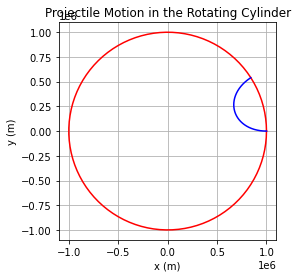

In [8]:
# plot a trajectory
plt.figure(1)

ax = plt.axes()

# Drawing the cylinder 
ncirc = 100
phi = np.linspace(0,2.*np.pi,ncirc)
xcirc = np.linspace(0,0,ncirc)
ycirc = np.linspace(0,0,ncirc)

for icirc in range(ncirc):
    xcirc[icirc] = R*np.cos(phi[icirc])
    ycirc[icirc] = R*np.sin(phi[icirc])
    
ax.set_aspect(1)

plt.plot(xcirc, ycirc, 'r')

# Plotting the trajectory
plt.plot(sol[0:k,0]*np.cos(sol[0:k,2]), sol[0:k,0]*np.sin(sol[0:k,2]), 'b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid()
plt.title("Projectile Motion in the Rotating Cylinder")
plt.show()

Text(0.5, 1.0, 'non-inertial')

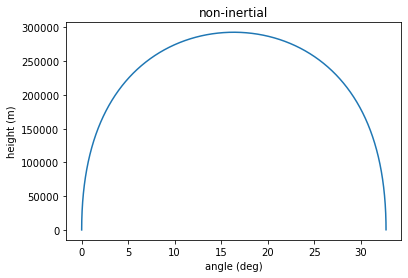

In [9]:
#part c

angle = (180./np.pi)*sol[0:k,2]
height = R-sol[0:k,0]

plt.plot(angle,height)
plt.xlabel('angle (deg)')
plt.ylabel('height (m)')
plt.title('non-inertial')

In [10]:
print('the impact angle in degrees is', angle[k-1])
print('the max height in meters is',max(height))

the impact angle in degrees is 32.704225639410964
the max height in meters is 292893.2047631913


Text(0.5, 0, 'Angle (deg)')

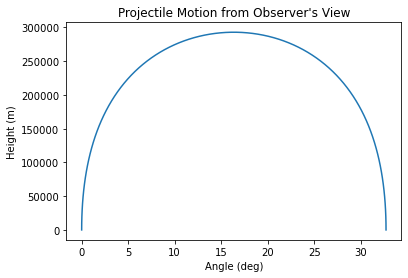

In [11]:
nt_inertial = 100
t_end_inertial = T/(2*np.pi)
eps = 1e-12

t = np.linspace(0,t_end_inertial-eps,nt_inertial)
x = np.linspace(0,0,nt_inertial)
y = np.linspace(0,0,nt_inertial)

for c in range(nt_inertial):
    phi = omega*t[c]
    x[c] = (180/np.pi)*(np.arctan(phi/(1-phi))-phi)
    y[c] = R*(1-np.sqrt(1-2*phi*(1-phi)))
    
plt.plot(x,y)
plt.title("Projectile Motion from Observer's View")
plt.ylabel("Height (m)")
plt.xlabel("Angle (deg)")

In [12]:
print('the impact angle in degrees is', max(x))
print('the max height in meters is',max(y))
print("therfore they agree")

the impact angle in degrees is 32.70422048691768
the max height in meters is 292857.1465378934
therfore they agree
